<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 


In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from google.colab import files
uploaded = files.upload()

Saving accidentalDeathUSA.txt to accidentalDeathUSA.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

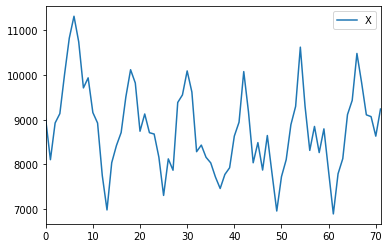

In [39]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [41]:
len(data)

72

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting sea

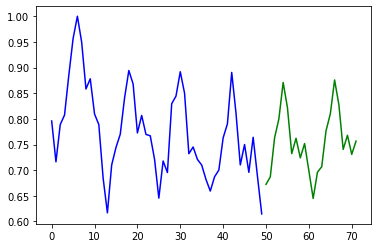

In [42]:
# Load/split the data
train, test = train_test_split(data_n, train_size=50)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:50], train, c='blue')
plt.plot(x[50:], forecasts, c='green')
plt.show()

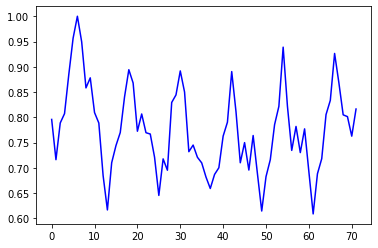

In [43]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [45]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.0011209914874161903


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [47]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); AIC=-119.528, BIC=-104.232, Fit time=0.903 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=-57.627, BIC=-53.803, Fit time=0.213 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=-122.805, BIC=-115.157, Fit time=0.145 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=-95.973, BIC=-88.325, Fit time=0.282 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=28.720, BIC=30.632, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=-90.250, BIC=-84.514, Fit time=0.077 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 12); AIC=-126.132, BIC=-116.572, Fit time=1.184 seconds
Near non-invertible roots for order (1, 0, 0)(2, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=-126.659, BIC=-117.099, Fit time=0

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=-87.767, BIC=-80.119, Fit time=0.393 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=-125.513, BIC=-114.041, Fit time=0.650 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=-125.548, BIC=-114.076, Fit time=0.718 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=-109.039, BIC=-99.479, Fit time=0.598 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=-122.626, BIC=-109.242, Fit time=0.810 seconds
Total fit time: 8.177 seconds


Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [49]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(22)
    print(forecasts)

[0.67384176 0.68974094 0.76229991 0.80292166 0.86891662 0.82780651
 0.74127673 0.77100855 0.73394692 0.75555447 0.70217565 0.64620356
 0.70242391 0.71364027 0.78354804 0.8206354  0.88341216 0.83908179
 0.7504569  0.77836622 0.74024807 0.76057063]


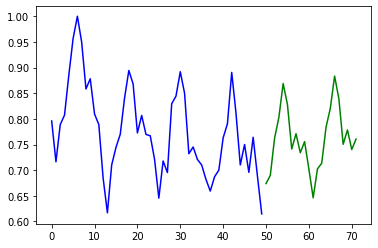

In [51]:
x = np.arange(data_n.shape[0])
plt.plot(x[:50], train, c='blue')
plt.plot(x[50:], forecasts, c='green')
plt.show()

In [52]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.0008834879576368229
